# TensorFlow实现多元线性回归（超详细）
在 TensorFlow 实现简单线性回归的基础上，可通过在权重和占位符的声明中稍作修改来对相同的数据进行多元线性回归。

在多元线性回归的情况下，由于每个特征具有不同的值范围，归一化变得至关重要。这里是波士顿房价数据集的多重线性回归的代码，使用 13 个输入特征。

波士顿房价数据集可从http://lib.stat.cmu.edu/datasets/boston处获取。

## 多元线性回归的具体实现

1. 导入需要的所有软件包

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2. 因为各特征的数据范围不同，需要归一化特征数据。为此定义一个归一化函数。另外，这里添加一个额外的固定输入值将权重和偏置结合起来。为此定义函数 append_bias_reshape()。该技巧有时可有效简化编程：

In [38]:
def normalize(X):
    """Normalizes the array X,规范化数组X."""
    mean = np.mean(X)
    #     std = np.std(arr,axis=0)  # axis=0计算每一列的标准差
    #     std = np.std(arr,axis=1)  # 计算每一行的标准差
    std = np.std(X)  # 计算全局标准差
    X = (X - mean) / std
    return X


def append_bias_reshape(features, labels):
    """给数据添加偏执"""
    m = features.shape[0]  # 行数
    n = features.shape[1]  # 列数
    x = np.reshape(np.c_[np.ones(m), features], [m, n + 1]) # 把添加过偏执的特征指定形状[m, n + 1]
    y = np.reshape(labels, [m, 1])
    return x, y

In [39]:
# np.c_ 和 np.r_ 的作用
a1 = np.array([[1, 2, 3], [4, 5, 6]])
a2 = np.array([[7, 8, 9], [3, 2, 1]])
b1 = np.c_[a1, a2]  # 把两个矩阵的列对齐
print('b1:', b1)
b2 = np.r_[a1, a2]  # 把两个矩阵的行对齐
print('b2:', b2)

b1: [[1 2 3 7 8 9]
 [4 5 6 3 2 1]]
b2: [[1 2 3]
 [4 5 6]
 [7 8 9]
 [3 2 1]]


3. 现在使用 TensorFlow contrib 数据集加载波士顿房价数据集，并将其划分为 X_train 和 Y_train。注意到 X_train 包含所需要的特征。可以选择在这里对数据进行归一化处理，也可以添加偏置并对网络数据重构：

In [40]:
# Date
boston = tf.contrib.learn.datasets.load_dataset('boston')  # 前十三列都是特征， 最后一个是标签
# 数据集的第5列房间数量（RM），最后一列为标签（MEDV）给出的房价
X_train, Y_train = boston.data, boston.target
X_train = normalize(X_train)  # 归一化
X_train, Y_train = append_bias_reshape(X_train, Y_train)
m = len(X_train)  # 培训示例数量
n = 13 + 1  # 特征的数量 + 偏执

4. 为训练数据声明 TensorFlow 占位符。观测占位符 X 的形状变化：

In [41]:
# Placeholder for the Training Data
X = tf.placeholder(tf.float32, name='X',
                   shape=[m, n])  # 输入数据的形状[m，n] m 为数据的数量 n 为一个数据的特征
Y = tf.placeholder(tf.float32, name='Y')

5. 为权重和偏置创建 TensorFlow 变量。通过随机数初始化权重：

In [5]:
# Variable for coefficients 系数变量
w = tf.Variable(tf.random_normal([n, 1]))

6. 定义要用于预测的线性回归模型。现在需要矩阵乘法来完成这个任务：

In [6]:
# The Liner Regression Model
Y_hat = tf.matmul(X,w) # 两个矩阵相乘

7. 为了更好地求微分，定义损失函数：

In [7]:
# Loss function tf.reduce_mean
# 函数用于计算张量tensor沿着指定的数轴（tensor的某一维度）上的的平均值，主要用作降维或者计算tensor（图像）的平均值。
loss = tf.reduce_mean(tf.square(Y - Y_hat, name='loss'))

8. 选择正确的优化器：

In [8]:
# Gradient Descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

9. 定义初始化操作符：

In [9]:
# Initializing Variables
init_op = tf.global_variables_initializer()
total = []

10. 开始计算图：

In [16]:
with tf.Session() as sess:
    # Initialize variables
    sess.run(init_op)
    writer = tf.summary.FileWriter('graphs', sess.graph)
    # train the model for 100 epochs
    for i in range(100):  # 迭代100次
        _, l = sess.run([optimizer, loss], feed_dict={X: X_train, Y: Y_train})
        total.append(l)  # 记录一个轮次的平均loss值
        print("Epoch {0}: Loss {1}".format(i, l))
    writer.close()
    w_value = sess.run([w])  # 获取最后的 b 和 w

Epoch 0: Loss 450.306884765625
Epoch 1: Loss 315.9251403808594
Epoch 2: Loss 239.66192626953125
Epoch 3: Loss 195.8450164794922
Epoch 4: Loss 170.16705322265625
Epoch 5: Loss 154.65354919433594
Epoch 6: Loss 144.85838317871094
Epoch 7: Loss 138.30178833007812
Epoch 8: Loss 133.59954833984375
Epoch 9: Loss 129.9781951904297
Epoch 10: Loss 127.00444030761719
Epoch 11: Loss 124.43476867675781
Epoch 12: Loss 122.13154602050781
Epoch 13: Loss 120.01606750488281
Epoch 14: Loss 118.04276275634766
Epoch 15: Loss 116.18439483642578
Epoch 16: Loss 114.42420196533203
Epoch 17: Loss 112.75123596191406
Epoch 18: Loss 111.15784454345703
Epoch 19: Loss 109.63838958740234
Epoch 20: Loss 108.18829345703125
Epoch 21: Loss 106.80375671386719
Epoch 22: Loss 105.48135375976562
Epoch 23: Loss 104.21802520751953
Epoch 24: Loss 103.01094055175781
Epoch 25: Loss 101.8573989868164
Epoch 26: Loss 100.75491333007812
Epoch 27: Loss 99.7010498046875
Epoch 28: Loss 98.69355773925781
Epoch 29: Loss 97.73030853271484


11. 绘制损失函数：

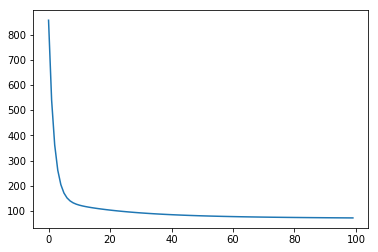

In [14]:
plt.plot(total) # 显示 loss 图
plt.show()

本节使用了 13 个特征来训练模型。简单线性回归和多元线性回归的主要不同在于权重，且系数的数量始终等于输入特征的数量。下图为所构建的多元线性回归模
型的 TensorBoard 图：
<img src="./Markdown_images/miao_15_TensorFlow_实现多元线性回归/01.png" width="800">

现在可以使用从模型中学到的系数来预测房价：

In [15]:
N = 500
X_new = X_train[N,:]
Y_pred = (np.matmul(X_new, w_value)).round(1)
print('Predicted value:${0} Actual value:/${1}'.format(Y_pred[0]*1000, Y_train[N] * 1000, '\nDone'))

Predicted value:$[23700.] Actual value:/$[16800.]
